# Notebook basics

If you highlight a code cell, you can press **Shift-Enter** to evaluate it. If you press **Alt-Enter**, the cell will evaluate and a new cell is inserted below it.

Navigation in Jupyter notebooks can be tricky. If you are in *command mode* (not editing a cell), lots of keyboard shortcuts are active, like "`j`" and "`k`" for scrolling, "`a`" for inserting a cell, or "`dd`" for deleting one (these should be familiar if you know `vi`). If you want to type in a cell, make sure to be in *edit mode* by checking you see a blinking cursor. 

  * To go to edit mode, press Enter or double click a cell.
  * To go back to command mode, press Esc or single click another cell.

<a id="toc"></a>

# Table of contents

* [Numpy](#numpy)
* [Plotting](#matplotlib)
* [Units](#units)
* [Sky coordinates](#skycoord)
* [Virtual Observatory (pyvo)](#pyvo)

<a id="numpy"></a>

# Numpy and speed

([back to table of contents](#toc))

In [ ]:
import numpy as np

Let's create a huge-ish numpy array with some numbers:

In [2]:
x = np.linspace(0, 1, 1000)

In [4]:
%%timeit
y = np.sin(x)

7.33 µs ± 590 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


(The `%%timeit`` magic command runs the command a few times; for slower commands you may want to use just `%time` so it will only once.)

In [5]:
%%timeit
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = np.sin(x[i])

1.51 ms ± 95.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


You should see that the loop version is more than a factor 100 slower. This is because python brings quite an overhead in converting types. In the numpy version, the actual loop is done in C, and thus very efficient.

### Broadcasting rules

To avoid loops in python, it's useful to know the numpy broadcasting rules. Adding `np.array`s of different shapes can sometimes work. Let's first play a bit:

In [6]:
vec = np.ones((5))

In [7]:
vec.shape

(5,)

In [8]:
mat = np.ones((5,5))

In [9]:
mat.shape

(5, 5)

**Question**: will this work? What would the answer be?

In [10]:
vec + mat

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

 * NumPy compares the shapes element-wise, starting with the trailing dimension
 * Two dimensions are compatible if they are equal or one of them is 1
 * Raises a ValueError: frames are not aligned if the shapes are incompatible
 * The size of a successfully broadcasted array is the maximum size along each dimension of the input arrays

**Exercise**: Adjust the example above to show the first two broadcasting rules.

As an illustration, let's read some LOFAR antenna positions. For reference, I did this with the following command which will only work if you have python-casacore installed:
```python
import casacore.tables as pt
positions = pt.taql("SELECT POSITION FROM ~/small.MS::ANTENNA").getcol("POSITION")
```
And for more reference, the following would have done the same:
```python
from lofarantpos.db import LofarAntennaDatabase
db = LofarAntennaDatabase()
positions = np.array(list(db.phase_centres.values()))
```

In [11]:
positions = np.array([[3826896.235,460979.455,5064658.203],[3826979.384,460897.597,5064603.189],[3826600.961,460953.402,5064881.136],[3826565.594,460958.11,5064907.258],[3826471.348,461000.138,5064974.201],[3826517.812,461035.258,5064936.15],[3826585.626,460865.844,5064900.561],[3826579.486,460917.48,5064900.502],[3826701.16,460989.25,5064802.685],[3826631.194,461021.815,5064852.259],[3826653.783,461136.44,5064824.943],[3826612.499,461080.298,5064861.006],[3826478.715,461083.72,5064961.117],[3826538.021,461169.731,5064908.827],[3826637.421,461227.345,5064829.134],[3826648.961,461354.241,5064809.003],[3826405.095,461507.46,5064978.083],[3826499.783,461552.498,5064902.938],[3826463.502,460533.094,5065022.614],[3826368.813,460488.057,5065097.759],[3827218.193,461403.898,5064378.79],[3827123.504,461358.861,5064453.935],[3826418.227,461805.837,5064941.199],[3826335.078,461887.696,5064996.213],[3825573.134,461324.607,5065619.039],[3825656.283,461242.749,5065564.025],[3826041.577,460323.374,5065357.614],[3825958.428,460405.233,5065412.628],[3826383.037,460279.343,5065105.85],[3826477.725,460324.381,5065030.705],[3826864.262,460451.924,5064730.006],[3826947.411,460370.066,5064674.992],[3825899.977,461698.906,5065339.205],[3825805.288,461653.869,5065414.35],[3826331.59,462759.074,5064919.62],[3826248.441,462840.933,5064974.634],[3826679.281,461855.243,5064741.38],[3826690.821,461982.139,5064721.249],[3827442.564,461050.814,5064242.391],[3827431.025,460923.919,5064262.521],[3827973.226,459728.624,5063975.3],[3827890.077,459810.483,5064030.313],[3826795.752,460158.894,5064808.929],[3826784.211,460031.993,5064829.062],[3825568.82,460647.62,5065683.028],[3825663.508,460692.658,5065607.883],[3829205.598,469142.533,5062181.002],[3831479.67,463487.529,5060989.903],[3847753.31,466962.809,5048397.244],[3828732.721,454692.421,5063850.334],[3829771.249,452761.702,5063243.181],[3837964.52,449627.261,5057357.585],[3845376.29,413616.564,5054796.341],[3818424.939,452020.269,5071817.644],[3811649.455,453459.894,5076728.952],[3824812.621,426130.33,5069251.754],[3824138.566,459476.972,5066858.578],[3797136.484,463114.447,5086651.286],[3783537.525,450130.064,5097866.146]])

In [12]:
positions.shape

(59, 3)

The second broadcasting rule, that uses the fact whether a dimension is 1, can be used to your advantage. Sometimes it's necessary to add a dimension to an existing array to make the broadcasting rules work for you.
It's possible to add a dummy axis by using `np.newaxis` in indexing.

In [13]:
positions[np.newaxis, :, :].shape

(1, 59, 3)

**Exercise**: use the `-` operator on `positions` to get the vectors between all pairs of LOFAR stations. This should be an array of shape (59, 59, 3). If you want, use `np.linalg.norm(..., axis=2)` on that to get the length of all baselines.

In [24]:
%%timeit
np.linalg.norm(positions[np.newaxis, :, :] - positions[:, np.newaxis, :], axis=2);

168 µs ± 8.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Exercise**: implement this with a loop and check how much slower it is.

In [20]:
dist = np.zeros((len(positions), len(positions)), dtype=np.float)

In [25]:
%%timeit
for ant1 in range(len(positions)):
    for ant2 in range(len(positions)):
        dist[ant1, ant2] = np.linalg.norm(positions[ant1] - positions[ant2])

17.3 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<a id="matplotlib"></a>

# Proper plotting (no pylab, use fig, ax, subplots)

([back to table of contents](#toc))

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

The `%matplotlib inline` sets up `matplotlib` to put the output as PNG into the notebook. To make it more interactive, use `%matplotlib notebook` to make javascript-based plots that you can interact with in your browser. If you want to know, you can use `%matplotlib --list` to see the options. Or if you forget this, remember `?%matplotlib`.

From now on, please never use `from pylab import *` anymore, as [recommended](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related) by its authors.

Matplotlib has [two ways](https://matplotlib.org/faq/usage_faq.html#coding-styles) to make plots. The MATLAB-like way is to use `plt.plot(np.sin(np.linspace(0,5,100)))`. We prefer the object-oriented way because it's more pythonic and shows a bit clearer what's going on:

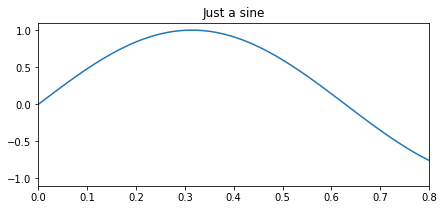

In [27]:
fig, ax = plt.subplots(figsize=(7,3));
ax.set_xlim([0,0.8])
ax.plot(np.linspace(0,1,100), np.sin(5*np.linspace(0,1,100)));
ax.set_title("Just a sine");

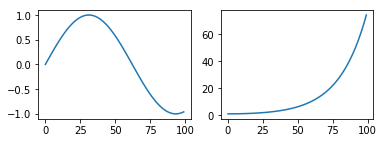

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,2));
ax1.plot(np.sin(np.linspace(0,5,100)));
ax2.plot(np.cosh(np.linspace(0,5,100)));

<a id="units"></a>

# Units and quantities

([back to table of contents](#toc))

Astropy has built-in support for [units](http://docs.astropy.org/en/stable/units/), and converting between them. Also, the `astropy.constants` holds useful constants, which of course usually have a unit.

In [29]:
import astropy.units as u

In [30]:
from astropy.constants import c as speed_of_light
from astropy.constants import m_e as electron_mass

In [31]:
electron_mass

<<class 'astropy.constants.codata2014.CODATA2014'> name='Electron mass' value=9.10938356e-31 uncertainty=1.1e-38 unit='kg' reference='CODATA 2014'>

This thing is a `Quantity`, which has a unit and a value.

In [32]:
isinstance(electron_mass, u.quantity.Quantity)

True

In [33]:
electron_mass.value

9.10938356e-31

In [34]:
electron_mass.unit

Unit("kg")

Declaring your own quantity is done like this:

In [35]:
tammo_mass = 78 * u.kg

**Exercise**: Type `u.` and use tab-completion to find the unit for astronomical unit.

Of course it's possible to convert to other units:

In [36]:
speed_of_light.to(u.km / u.h)

<Quantity 1.07925285e+09 km / h>

A useful abbreviation is the attribute `.si` which gives a quantity in SI-units.

**Exercise**: Use `astropy.units` to compute the light travel time from the Sun to Earth in minutes.

In [37]:
(1 * u.AU / speed_of_light).to(u.min)

<Quantity 8.3167464 min>

**Exercise**: how many atomic masses does your favorite tutor weigh? (Atomic mass: `u.u`)

In [38]:
tammo_mass.to(u.u)

<Quantity 4.69726987e+28 u>

**Exercise**: convert $\mathrm{50\,\mathrm{Jansky}}$ to $\mathrm{erg}/\mathrm{cm}^2$

In [50]:
(50*u.Jy).to(u.erg/u.cm**2)

<Quantity 5.e-22 erg / cm2>

### Equivalencies

Some units are not convertible by default. An example is `MHz` and `cm`, although we all know how to convert those.

Astropy does not, by default:

In [51]:
(21.106*u.cm).to(u.MHz)

UnitConversionError: 'cm' (length) and 'MHz' (frequency) are not convertible

**Exercise**: Use `speed_of_light` and unit conversion to find the frequency in `MHz` that corresponds to `21.106 cm`

In [52]:
(speed_of_light / (21.106*u.cm)).to(u.MHz)

<Quantity 1420.41342746 MHz>

With an "equivalency" for the function `.to()`, astropy does know how to convert these:

In [53]:
(21.106*u.cm).to(u.MHz, equivalencies=u.spectral())

<Quantity 1420.41342746 MHz>

Another useful equivalency:

In [54]:
(1421.01*u.MHz).to(u.km/u.s, equivalencies=u.doppler_radio(rest=21.106*u.cm))

<Quantity -125.9126 km / s>

It is possible to enable one (only one I think..) equivalency globally.
    

In [55]:
u.set_enabled_equivalencies(u.spectral())

In [56]:
(23*u.cm).to(u.MHz)

<Quantity 1303.44546957 MHz>

A more proper way to enable more equivalencies is to embed them in a `with` statement:

In [57]:
with u.set_enabled_equivalencies(u.spectral()):
    with u.set_enabled_equivalencies(u.doppler_radio(rest=21.106*u.cm)):
        print((-125*u.km/u.s).to(u.cm)) # This is scary

21.0972034130404 cm


And another one that may be useful:

In [58]:
beam_sigma = 50*u.arcsec
beam_area = 2*np.pi*(beam_sigma)**2
(1*u.Jy/beam_area).to(u.K, equivalencies=u.brightness_temperature(5*u.GHz))

<Quantity 3.52629514 K>

Recall the Rayleigh-Jeans law: $B_{\lambda} (T) = \frac{2 \cdot c \cdot k_{\mathrm{B}} \cdot T}{\lambda^4}$, where $B_{\lambda}$ is the  spectral radiance; the power emitted per unit emitting area, per steradian, per unit wavelength, $c$  is the speed of light, $k_{\mathrm{B}}$ is the Boltzmann constant and $T$ is the temperature in kelvins.

**Exercise**: implement the function `rayleigh_jeans(lamda, t)` that for a given wavelength and temperature, returns the spectral radiance, with appropriate units. (We'll use `lamda` here because `lambda` is a reserved word in Python.)

*Hint*: use tab completion on `astropy.constants.` to find available constants.

In [59]:
from astropy.constants import k_B

In [60]:
#@u.quantity_input(lamda=u.m, t=u.K)
def rayleigh_jeans(lamda, t):
    return (2 * speed_of_light * k_B * t) / lamda**4

**Exercise**: plot this function at $T=30\mathrm{K}$ for $\lambda \in (10\mathrm{cm}, 1\mathrm{m})$

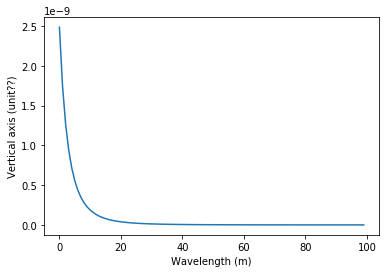

In [61]:
fig, ax = plt.subplots();
ax.plot(rayleigh_jeans(np.linspace(0.1, 1, 100)*u.m, 30*u.K));
ax.set_xlabel("Wavelength (m)");
ax.set_ylabel("Vertical axis (unit??)");

Astropy has a way to add unit support to matplotlib plots:

In [62]:
from astropy.visualization import quantity_support

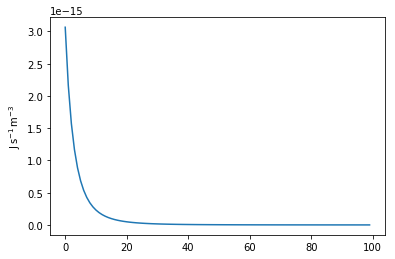

In [63]:
plt.figure()
with quantity_support():
    plt.plot(rayleigh_jeans(np.linspace(3, 30, 100)*u.m, 30*u.K))

It can get more fancy by using the function decorator `u.quantity_input` which understands the unit of input for your function. In this way, you can specify the arguments to your function with a different unit (e.g. `km` instead of `m`) and astropy will do the conversion for you.

In [64]:
@u.quantity_input(lamda=u.m, t=u.K)
def rayleigh_jeans(lamda, t):
    return (2 * speed_of_light * k_B * t) / lamda**4

In [65]:
rayleigh_jeans(50*u.MHz, 300*u.K)

<Quantity 3.97351693e-19 J m / (MHz4 s)>

Note that typing `u.m` everywhere will cause some overhead, but it might save you a few days of debugging a case where you forgot which unit you used.

## Time

Astropy has good support for times and dates. As you know, there is only one good way to format time: [ISO8601](https://xkcd.com/1179/). To convert to and from this, use `astropy.time`.

In [66]:
from astropy.time import Time

In [67]:
t = Time("2019-03-13T11:30")

In [68]:
t.isot

'2019-03-13T11:30:00.000'

In [69]:
t.mjd

58555.479166666664

**Exercise**: How many seconds were there between `1997-01-01 00:00` UTC and `2000-01-01 00:00` UTC?

In [70]:
(Time("2000-01-01 00:00") - Time("1997-01-01 00:00")).to(u.s)

<Quantity 94608002. s>

**Exercise**: How many leap seconds have there been in your life?

In [71]:
(Time("2019-01-01") - Time("1981-01-01")).to(u.s).value%100

18.0

## Angles

A special case of units are angles, not unimportant in astronomy. Of course normal angles 'just work', though they're not very smart (don't take care of unwrapping):

In [72]:
365*u.deg

<Quantity 365. deg>

In [73]:
(135*u.deg).to(u.rad)

<Quantity 2.35619449 rad>

In [74]:
np.deg2rad(135*u.rad)

<Quantity 135. rad>

Note that what happened here is bit scary: astropy 'patched' the function `np.deg2rad` to be type-aware, and the argument got converted to degrees before it entered the function.

To input sexagesimal angles, use `Angle` to make it format nicely automatically.

In [75]:
from astropy.coordinates import Angle

In [76]:
ra = Angle("8h34m5.54s")
ra

<Angle 8.56820556 hourangle>

In [77]:
dec = Angle("-45d50m0s")
dec

<Angle -45.83333333 deg>

In [78]:
ra.hms

hms_tuple(h=8.0, m=34.0, s=5.540000000001868)

In [79]:
dec.dms

dms_tuple(d=-45.0, m=-50.0, s=-8.526512829121202e-12)

In [80]:
dec.signed_dms

signed_dms_tuple(sign=-1.0, d=45.0, m=50.0, s=8.526512829121202e-12)

<a id="skycoord"></a>

# Sky coordinates

([back to table of contents](#toc))

In [81]:
from astropy.coordinates import SkyCoord

Coordinates on the sky are of course `SkyCoord`s. You can make one as follows:

In [82]:
my_obj = SkyCoord(ra=ra, dec=dec)

The default frame is ICRS, which is about the same as J2000.

Many convenience methods are available for SkyCoord. The best is for tutorials is `from_name`, which gets you an object by querying simbad.

In [83]:
polaris = SkyCoord.from_name("polaris")

In [84]:
polaris.ra

<Longitude 37.95456067 deg>

In [85]:
polaris.dec

<Latitude 89.26410897 deg>

In [86]:
polaris.separation(my_obj)

<Angle 135.83576978 deg>

In [87]:
polaris.galactic

<SkyCoord (Galactic): (l, b) in deg
    (123.28054967, 26.46139598)>

In [88]:
gal_center = SkyCoord(l=0*u.deg, b=0*u.deg, frame="galactic")

**Exercise**: how many radians is the galactic center from M31?

In [89]:
gal_center.separation(SkyCoord.from_name("M31")).to(u.rad)

<Angle 2.07302669 rad>

<a id="pyvo"></a>

# PyVO

([back to table of contents](#toc))

In [309]:
import pyvo as vo

In [310]:
lotss_center = SkyCoord(ra=195.89191*u.deg, dec=49.74803*u.deg)

In [311]:
lotss_query = vo.dal.scs.SCSQuery('https://vo.astron.nl/hetdex/lotss-dr1/cone/scs.xml')
lotss_query['RA'] = lotss_center.ra.to(u.deg).value
lotss_query['DEC'] = lotss_center.dec.to(u.deg).value
lotss_query.radius = 0.5*u.deg

In [312]:
lotss_table = lotss_query.execute().to_table()

In [313]:
lotss_table[:5]

Source_Name,RA,E_RA,DEC,E_DEC,Peak_flux,E_Peak_flux,Total_flux,E_Total_flux,Major,E_Maj,Minor,E_Min,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,PA,E_PA,DC_PA,E_DC_PA,Isl_rms,S_Code,Mosaic_ID,Masked_Fraction,ID_flag,ID_name,ID_ra,ID_dec,ML_LR,LGZ_Size,LGZ_Width,LGZ_PA,LGZ_Assoc,LGZ_Assoc_Qual,LGZ_ID_Qual,Deblended_from,AllWISE,objid,gFApFlux,gFApFluxErr,gFApMag,gFApMagErr,rFApFlux,rFApFluxErr,rFApMag,rFApMagErr,iFApFlux,iFApFluxErr,iFApMag,iFApMagErr,zFApFlux,zFApFluxErr,zFApMag,zFApMagErr,yFApFlux,yFApFluxErr,yFApMag,yFApMagErr,gFKronFlux,gFKronFluxErr,rFKronFlux,rFKronFluxErr,iFKronFlux,iFKronFluxErr,zFKronFlux,zFKronFluxErr,yFKronFlux,yFKronFluxErr,W1Flux,W1FluxErr,W1Mag,W1MagErr,W2Flux,W2FluxErr,W2Mag,W2MagErr,W3Flux,W3FluxErr,W3Mag,W3MagErr,W4Flux,W4FluxErr,W4Mag,W4MagErr,z_best,z_best_source,z_spec,z_spec_source,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,specAGN,mqcAGN,XrayClass,_2RXS_ID,XMMSL2_ID,IRClass,EBV,PanSTARRS_Missing,u_rest,g_rest,r_rest,i_rest,z_rest,U__rest,B_rest,V_rest,I__rest,J_rest,Ks_rest,w1_rest,w2_rest,w3_rest
,deg,arcs,deg,arcs,mJy/beam,mJy/beam,mJy,mJy,arcs,arcs,arcs,arcs,arcs,arcs,arcs,arcs,deg,deg,deg,deg,mJy/beam,,,,,,deg,deg,,arcs,arcs,deg,,,,,,,uJy,uJy,mag,mag,uJy,uJy,mag,mag,uJy,uJy,mag,mag,uJy,uJy,mag,mag,uJy,uJy,mag,mag,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,mag,mag,uJy,uJy,mag,mag,uJy,uJy,mag,mag,uJy,uJy,mag,mag,,,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,int32,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,int16,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ILTJ130616.21+495910.3,196.567555844856,1.66553235524298,49.9862182368527,0.662037786326261,0.215866403278961,0.0572481996819551,0.509229093967978,0.0789794330318615,--,3.93851902152287,--,1.51658780990588,10.8587157646535,3.93851902152287,3.29556137334494,1.51658780990588,84.836709698722,26.3265792301626,84.836709698722,26.3265792301626,0.0558077881578356,S,P34Hetdex06,0.0,1,,--,--,--,--,--,--,--,--,--,,,,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,,0,--,,,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
ILTJ130605.33+495950.8,196.522193843944,0.303891806925671,49.9974641296175,0.513537279977256,0.423505751242122,0.059165029902782,0.516878684098851,0.0970983536179056,--,1.21504893859048,--,0.705772321138932,0.0,1.21504893859048,0.0,0.705772321138932,173.630844694789,23.3455533743703,0.0,23.3455533743703,0.0575732738070656,S,P34Hetdex06,0.0,1,PSO J130605.380+495951.153,196.5223641,49.99752973,690.036378825709,--,--,--,--,--,--,,J130605.38+495950.8,,3.06574343311769,0.786777194911153,22.6836604833287,0.278637956576939,8.75067277446298,0.792770637928557,21.5448963900143,0.0983626980293588,23.86321376618,0.871276116296454,20.4556776708459,0.0396416020521424,53.3544173822394,2.16225148737708,19.5820740453171,0.0440007564288181,53.2063345281705,4.04305227911709,19.5850916482634,0.08250311313671,2.01803338172421e-06,6.17555968062254e-07,7.34663736530279e-06,7.0943738525941e-07,2.36167975642223e-05,7.81940236721431e-07,4.7343137901633e-05,2.767951048770

In [314]:
tgss_query = vo.dal.scs.SCSQuery('https://vo.astron.nl/tgssadr/q/cone/scs.xml')
tgss_query['RA'] = lotss_center.ra.to(u.deg).value
tgss_query['DEC'] = lotss_center.dec.to(u.deg).value
tgss_query.radius = 1.5*u.deg

In [315]:
tgss_table = tgss_query.execute().to_table()

In [316]:
tgss_table[:5]

ID,RA,e_RA,DEC,e_DEC,Sint,e_Sint,Spk,e_Spk,MAJAX,e_MAJAX,MINAX,e_MINAX,PA,e_PA,Island_RMS,S_Code,Mosaic_Name
,deg,arcs,deg,arcs,mJy,mJy,mJy/beam,mJy/beam,arcs,arcs,arcs,arcs,deg,deg,mJy/beam,,
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object
J131128.1+502514,197.86739,2.0,50.42066,2.0,725.3,72.6,635.0,63.5,27.8,0.1,25.7,0.1,-32.3,2.2,2.3,S,R40D64
J131216.0+500605,198.06668,2.0,50.10156,2.0,2131.7,213.3,1034.3,103.5,43.5,0.1,25.9,0.1,9.4,0.3,2.3,M,R40D64
J131212.0+500651,198.05014,2.1,50.11438,2.1,36.9,5.5,38.9,4.5,24.4,1.4,24.3,1.4,14.9,0.4,2.3,C,R40D64
J131052.8+500412,197.7202,2.6,50.07018,2.4,50.7,6.2,26.6,3.6,43.2,4.6,27.5,2.1,-57.6,10.8,2.3,S,R40D64
J130945.9+500724,197.44145,2.1,50.1236,2.1,67.1,7.7,54.3,5.9,29.5,1.3,26.1,1.1,-6.8,15.3,2.2,S,R40D64
J131117.3+495331,197.8222,2.0,49.89199,2.0,89.6,9.8,81.8,8.5,27.0,0.8,25.4,0.7,-31.9,20.0,2.4,S,R40D64
J131132.8+493921,197.88695,2.1,49.65585,2.1,61.4,7.5,54.9,6.1,26.7,1.3,26.2,1.2,-78.1,90.0,2.5,S,R40D64
J130953.7+494415,197.47401,2.5,49.73753,2.5,33.3,5.1,22.5,3.4,31.8,3.7,29.1,3.2,-46.9,55.0,2.4,S,R40D64


In [317]:
lotss_sources = SkyCoord(ra=lotss_table['RA'], dec=lotss_table['DEC'])

In [318]:
tgss_sources = SkyCoord(ra=tgss_table['RA'], dec=tgss_table['DEC'])

In [319]:
lotss_idx, dist_2d, _ = tgss_sources.match_to_catalog_sky(lotss_sources)

In [320]:
lotts_idx

array([  0,  19,  19,  19,   0,  19, 347, 347, 363, 359, 479, 479, 479,
       496, 496, 542,  92,  92,  92,  92,  92,  97,  92, 137, 144,   7,
         7,  92,   7,   0,   7,  92,  92,  94,  97, 137, 137, 137,  92,
        92,  94, 137, 144, 144, 137,   0,  19,   7,   2, 347,  43,  27,
        71,  71,  92, 115, 152, 152, 152, 162, 188, 192, 210, 214, 137,
       137, 144, 144, 152, 144, 152, 290, 290, 290, 290, 295, 295, 341,
       341, 341, 341, 341, 341, 365, 391, 421, 359, 363, 363, 479, 523,
       632, 633, 633, 633, 643, 766, 846, 542, 542, 542, 859, 856, 856,
       856, 856, 856, 860, 867, 863, 867, 855, 854, 855, 855, 863, 836,
       854, 836, 742, 742, 742, 843, 850, 749, 742, 742, 742, 850, 850,
       850, 850, 749, 749, 855, 843, 843, 856, 856, 860, 860, 863, 836,
       867, 867, 867, 836, 836, 867, 855, 836])

In [321]:
dist_2d.to(u.deg).value

array([9.38557071e-01, 9.54753484e-01, 9.47699500e-01, 7.31929159e-01,
       5.77656862e-01, 7.68967427e-01, 8.08510540e-01, 5.48729794e-01,
       3.61041246e-01, 8.74869681e-01, 9.37200069e-01, 4.79595620e-01,
       6.16756889e-01, 4.52375739e-01, 5.14839397e-01, 6.98380465e-01,
       9.23569198e-01, 9.77709430e-01, 8.46977408e-01, 8.91539185e-01,
       9.12932804e-01, 8.79394119e-01, 7.29393068e-01, 7.99999279e-01,
       8.89855866e-01, 8.61571246e-01, 7.07133662e-01, 6.74153364e-01,
       5.51861539e-01, 5.11012570e-01, 4.52109571e-01, 5.50365157e-01,
       4.70004340e-01, 4.80790210e-01, 5.10925103e-01, 4.67501118e-01,
       4.60369608e-01, 4.81897908e-01, 2.41594121e-01, 3.79011254e-01,
       1.87176576e-01, 3.00117203e-01, 3.37300459e-01, 3.26897175e-01,
       2.15809811e-01, 5.33354135e-01, 2.79932970e-01, 1.08520414e-01,
       1.00817933e-01, 1.99014198e-01, 4.07407340e-02, 7.49015987e-04,
       5.50165631e-03, 5.02461598e-03, 2.08759161e-04, 6.60995824e-04,
      

Note: Barnard's star simbad astroquery example at https://astroquery.readthedocs.io/en/latest/simbad/simbad.html

## Image access

In [327]:
tgss_service = vo.dal.sia.SIAService('https://vo.astron.nl/tgssadr/q_fits/imgs/siap.xml')

In [328]:
lotss_service = vo.dal.sia.SIAService('https://vo.astron.nl/hetdex/lotss-dr1-img/imgs/siap.xml')

In [329]:
tgss_service.description

'Download the TGSS Alternative Data Release mosaic images (5 deg\nsquare mosaics).'

In [330]:
res = lotss_service.search(pos=lotss_center, size=0.01)

In [331]:
res['imageTitle']

masked_array(data=[b'P34Hetdex06-low-residual-mosaic',
                   b'P34Hetdex06-residual-mosaic',
                   b'P34Hetdex06-low-mosaic', b'P34Hetdex06-mosaic',
                   b'P34Hetdex06-mosaic-rms'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object)

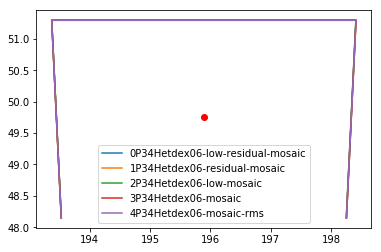

In [332]:
fig, ax = plt.subplots()
for num, cov in enumerate(res['coverage']):
    ax.plot(cov[::2], cov[1::2], label=str(num)+res['imageTitle'][num].decode('utf-8'));
ax.plot([lotss_center.ra.to(u.deg).value], [lotss_center.dec.to(u.deg).value], 'ro');
ax.legend();

In [333]:
import astropy.io.fits as fits

In [334]:
res['accref'][2].decode('utf-8')

'https://vo.astron.nl/getproduct/hetdex/data/low-mosaics/P34Hetdex06-low-mosaic.fits'

In [335]:
f = fits.open(res['accref'][2].decode('utf-8'))

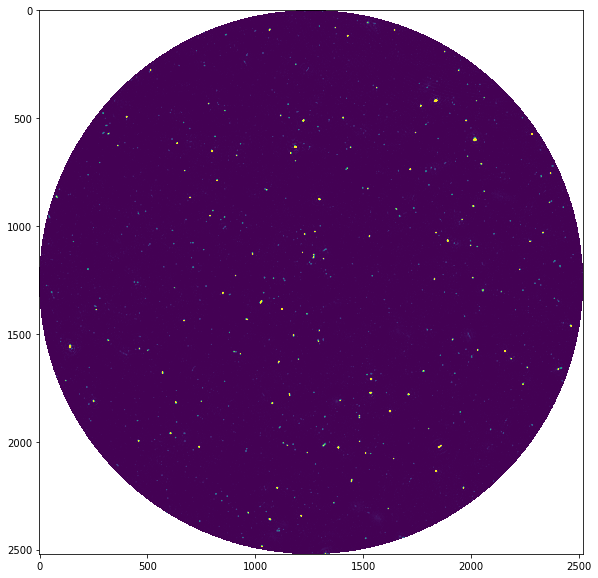

In [336]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(f[0].data.squeeze(),
          vmin=0,
          vmax=np.percentile(f[0].data[np.logical_not(np.isnan(f[0].data))], 99.9)
         );

It would of course be better to add proper axes.

In [337]:
from astropy.wcs import WCS

In [338]:
wcs = WCS(f[0])

In [339]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 195.89191  49.74803  
CRPIX : 1260.0  1260.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00125  0.00125  
NAXIS : 2520  2520

In [391]:
def plot_lotss(tgss_dots=False, lotss_dots=False, lotss_flux_min=100):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)
    ax.imshow(f[0].data.squeeze(),
              vmin=0,
              vmax=np.percentile(f[0].data[np.logical_not(np.isnan(f[0].data))], 99.9)
             );
    if lotss_dots:
        lotss_subset = lotss_table[lotss_table["Total_flux"]>lotss_flux_min]
        ax.plot(lotss_subset["RA"], lotss_subset["DEC"], 'ro', transform=ax.get_transform('world'),
               label="LoTSS catalog > {}mJy".format(lotss_flux_min));            
    if tgss_dots:
        ax.plot(tgss_table["RA"], tgss_table["DEC"], 'y.', transform=ax.get_transform('world'),
               label="TGSS catalog");
    ax.legend()
    return ax

In [392]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider

In [393]:
interact(plot_lotss, lotss_flux_min=FloatSlider(min=0, max=150, step=5, continuous_update=False));

interactive(children=(Checkbox(value=False, description='tgss_dots'), Checkbox(value=False, description='lotss…

TGSS + LoTSS, Astropy crossmatch

Barnard's star uit GAIA

Astroquery

In [528]:
tap_service = vo.dal.TAPService('https://gaia.aip.de/tap')

In [624]:
tap_result = tap_service.run_sync('SELECT TOP 5 source_id, ra, dec FROM gdr2.gaia_source order by random_index')

In [534]:
print(tap_result.to_table())

     source_id             ra               dec       
                       Angle[deg]        Angle[deg]   
------------------- ---------------- -----------------
4205572950572486656 284.997396761671  -7.2137936162749
4205565597589384320 285.403309358952 -7.14858421994595
4053206649305182080 275.626768559365 -25.1338124568725
4205568964799943680 285.346380248197 -7.11038996178636
4049398731303340416 274.009409438469 -30.5251247235525
